In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv("finaldataset.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
330,42,F,HIGH,HIGH,21.034,DrugY
331,41,F,LOW,NORMAL,29.112,DrugY
332,42,F,LOW,NORMAL,29.271,DrugY
333,49,F,NORMAL,HIGH,16.275,DrugY


In [4]:
df.Sex = df.Sex.map({'M':1,'F':2}) 
df.BP = df.BP.map({'HIGH':2,'NORMAL':1,'LOW':0})
df.Cholesterol = df.Cholesterol.map({'HIGH':1,'NORMAL':0})
df.Drug = df.Drug.map({'DrugY':1,'drugX':2 ,'drugA':3 , 'drugC':4,'drugB':5 })
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,2,1,25.355,1
1,47,1,0,1,13.093,4
2,47,1,0,1,10.114,4
3,28,2,1,1,7.798,2
4,61,2,0,1,18.043,1


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug', axis = 1)
y = df.Drug

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 45, stratify=y)
X_train.shape, X_test.shape

((234, 5), (101, 5))

In [6]:
from sklearn import preprocessing
from sklearn.svm import SVC

svm = SVC(kernel ='linear')
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred

array([5, 1, 2, 1, 1, 1, 2, 3, 1, 4, 2, 2, 4, 1, 1, 5, 2, 2, 2, 1, 1, 1,
       3, 5, 3, 5, 2, 1, 2, 3, 1, 3, 4, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 5,
       2, 1, 1, 3, 1, 3, 3, 1, 2, 3, 1, 2, 3, 2, 4, 2, 2, 5, 1, 3, 1, 2,
       5, 1, 3, 1, 2, 3, 3, 3, 2, 2, 1, 2, 1, 2, 1, 4, 4, 2, 4, 1, 5, 3,
       2, 3, 4, 2, 2, 1, 1, 4, 1, 3, 3, 4, 1])

In [7]:
from sklearn.metrics import accuracy_score

svm_acc = accuracy_score(y_test, y_pred)
print('accuracy_score: ', svm_acc)

accuracy_score:  0.9504950495049505


In [8]:
from sklearn import  metrics

svm_acc = 100*svm.score(X_test, y_test)
print('Support Vector Machine Predictions : \n', svm.predict(X_test), '\n Accuracy:', svm_acc, '%')

Support Vector Machine Predictions : 
 [5 1 2 1 1 1 2 3 1 4 2 2 4 1 1 5 2 2 2 1 1 1 3 5 3 5 2 1 2 3 1 3 4 1 1 1 2
 1 1 1 3 1 1 5 2 1 1 3 1 3 3 1 2 3 1 2 3 2 4 2 2 5 1 3 1 2 5 1 3 1 2 3 3 3
 2 2 1 2 1 2 1 4 4 2 4 1 5 3 2 3 4 2 2 1 1 4 1 3 3 4 1] 
 Accuracy: 95.04950495049505 %


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, n_estimators = 100, max_features = 5, random_state = 45)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([5, 1, 2, 1, 1, 1, 2, 3, 1, 4, 2, 2, 4, 1, 1, 5, 2, 2, 2, 1, 1, 1,
       3, 5, 3, 5, 2, 1, 2, 3, 1, 3, 4, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 5,
       2, 1, 1, 3, 1, 3, 3, 1, 2, 3, 1, 2, 3, 2, 4, 2, 2, 5, 1, 3, 1, 2,
       1, 1, 3, 1, 2, 3, 3, 3, 2, 2, 1, 2, 1, 2, 1, 4, 4, 2, 4, 1, 1, 3,
       2, 3, 4, 2, 2, 1, 1, 4, 1, 3, 3, 4, 1])

In [10]:
from sklearn.metrics import accuracy_score

rf_acc = accuracy_score(y_test, y_pred)
print("accuracy_score: ", rf_acc)

accuracy_score:  0.9801980198019802


In [11]:
from sklearn import  metrics

rf_acc = 100*rf.score(X_test, y_test)
print('Random Forest Classifier Predictions : \n', rf.predict(X_test), '\n Accuracy:', rf_acc, '%')

Random Forest Classifier Predictions : 
 [5 1 2 1 1 1 2 3 1 4 2 2 4 1 1 5 2 2 2 1 1 1 3 5 3 5 2 1 2 3 1 3 4 1 1 1 2
 1 2 1 3 1 1 5 2 1 1 3 1 3 3 1 2 3 1 2 3 2 4 2 2 5 1 3 1 2 1 1 3 1 2 3 3 3
 2 2 1 2 1 2 1 4 4 2 4 1 1 3 2 3 4 2 2 1 1 4 1 3 3 4 1] 
 Accuracy: 98.01980198019803 %


In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array([2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1])

In [13]:
from sklearn.metrics import accuracy_score

gnb_acc = accuracy_score(y_test, y_pred)
print("accuracy_score: ", gnb_acc)

accuracy_score:  0.6237623762376238


In [14]:
from sklearn import  metrics

gnb_acc = 100*gnb.score(X_test, y_test)
print('Naive Bayes Predictions : \n', gnb.predict(X_test), '\n Accuracy:', gnb_acc, '%')

Naive Bayes Predictions : 
 [2 1 2 1 1 1 2 1 1 2 2 2 2 1 1 2 2 2 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2
 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1
 2 2 1 2 1 2 1 2 2 2 2 1 1 1 2 1 2 2 2 1 1 2 1 1 1 2 1] 
 Accuracy: 62.37623762376238 %


In [15]:
pd.DataFrame(data={'Model': [ 'Random Forest Classifier', 'Naive Bayes', 'Support Vector Machine (SVM)'], 'Accuracy %': [ rf_acc, gnb_acc, svm_acc]})

,Model,Accuracy %
0,Random Forest Classifier,98.019802
1,Naive Bayes,62.376238
2,Support Vector Machine (SVM),95.049505


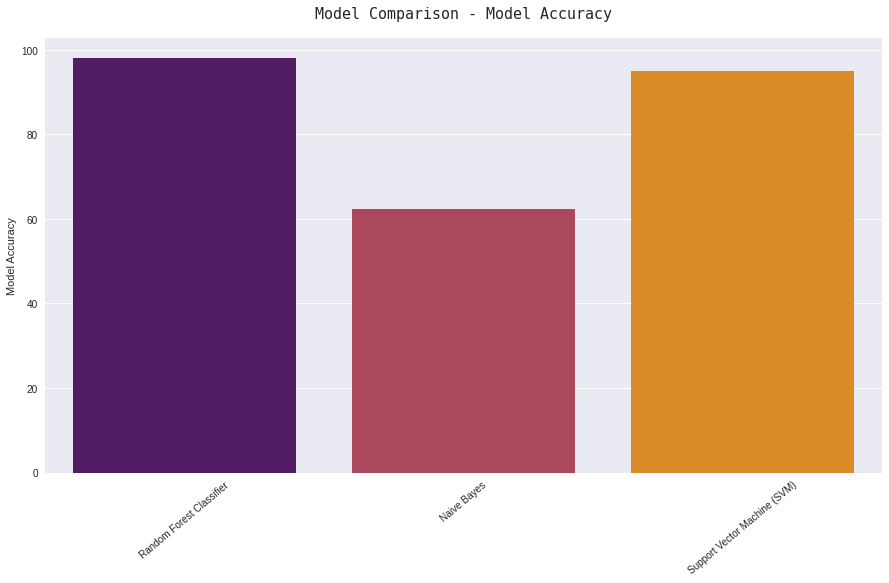

In [16]:
plt.style.use("seaborn")

x = [ 'Random Forest Classifier', 'Naive Bayes','Support Vector Machine (SVM)']

y = [ rf_acc, gnb_acc, svm_acc]

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=x,y=y, palette='inferno')
plt.ylabel('Model Accuracy')
plt.xticks(rotation=40)
plt.title('Model Comparison - Model Accuracy', fontsize=15, fontname='monospace', y=1.03);

In [17]:
age=int(input("Enter your age:"))
gender=input("Enter your gender:")
bp=input("Enter your bp level: ")
choles=input("Enter your cholestrol level: ")
natok=float(input("Enter Na_to_k ratio:"))

Enter your age:21
Enter your gender:F
Enter your bp level: NORMAL
Enter your cholestrol level: NORMAL
Enter Na_to_k ratio:13.5


In [18]:
if gender == "M":
  gender = 1
elif gender == "F":
  gender = 2
if bp == "HIGH":
  bp = 2
elif bp == "LOW":
  bp = 0
elif bp=="NORMAL":
  bp=1
if choles == "HIGH":
  choles = 1
elif choles == "NORMAL":
  choles = 0

In [19]:
input_data = np.array([[age, gender, bp, choles, natok]])
prediction = rf.predict(input_data)
if prediction[0] == 1:
  print("DrugY is prescribed")
elif prediction[0] == 2:
  print("DrugX is prescribed")
elif prediction[0] == 3:
  print("DrugAis prescribed")
elif prediction[0] == 4:
  print("DrugC is prescribed")
elif prediction[0] == 5:
  print("DrugB is prescribed")

DrugY is prescribed
